In [1]:
from chebGreen import ChebGreen
import numpy as np
import matplotlib.pyplot as plt

from chebGreen.chebpy2 import Quasimatrix
from chebGreen.chebpy2.chebpy import chebfun
from chebGreen.chebpy2 import Chebfun2

# %env TF_MLC_LOGGING=1
# %env TF_CPP_MIN_LOG_LEVEL=2

In [2]:
Theta = [1,2,4]
domain = [-1,1,-1,1]
generateData = True
script = "generate_example"
example = "mean_condition"
homogeneousBC = False
mean = ChebGreen(Theta, domain, generateData, script, example, homogeneousBC)

Generating dataset for example 'mean_condition'
Dataset found for Theta = 1.00. Skipping dataset generation.
Dataset found for Theta = 2.00. Skipping dataset generation.
Dataset found for Theta = 4.00. Skipping dataset generation.
-------------------------------------------------------------------------------

Generating chebfun2 models:
Found saved model, Loading model for example 'mean_condition' at Theta = 1.00
Learning a chebfun2 model for example 'mean_condition' at Theta = 1.00
Chebfun2 model added for example 'mean_condition' at Theta = 1.00

Found saved model, Loading model for example 'mean_condition' at Theta = 2.00
Learning a chebfun2 model for example 'mean_condition' at Theta = 2.00
Chebfun2 model added for example 'mean_condition' at Theta = 2.00

Found saved model, Loading model for example 'mean_condition' at Theta = 4.00
Learning a chebfun2 model for example 'mean_condition' at Theta = 4.00
Chebfun2 model added for example 'mean_condition' at Theta = 4.00



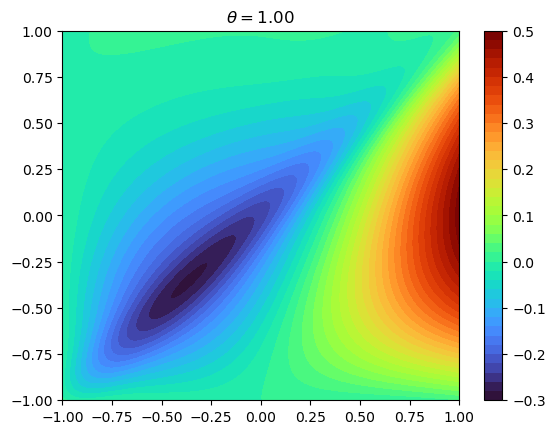

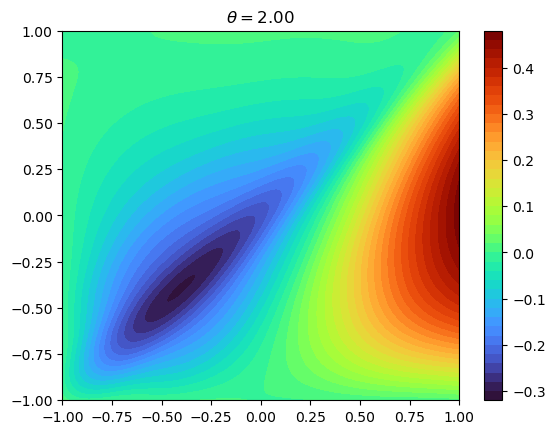

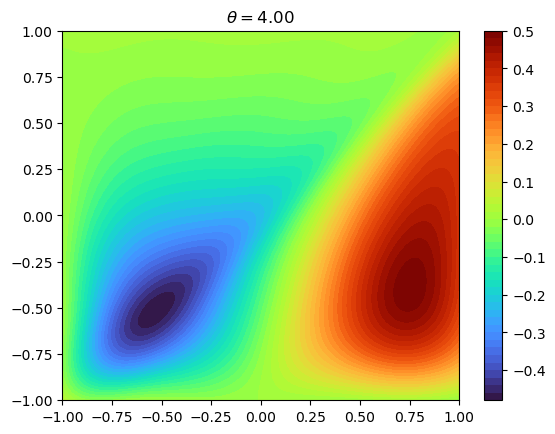

In [3]:
for t in Theta:
    fig = plt.figure()
    mean.G[t].plot(fig = fig)
    plt.title(f"$\\theta = {{{t:4.2f}}}$")

In [4]:
%%time
U, S, V = [],[],[]
for t in Theta:
    u,s,v = mean.G[t].svd()
    U.append(u)
    S.append(s)
    V.append(v)

CPU times: user 1.99 s, sys: 2.55 s, total: 4.54 s
Wall time: 484 ms


In [5]:
t = 0
u,s,v = U[t],S[t],V[t]

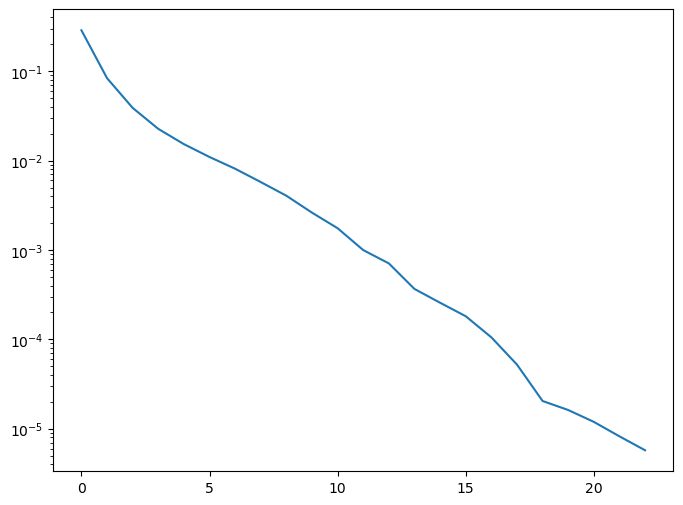

In [6]:
fig = plt.figure(figsize = (8,6))
plt.semilogy(s)

(-1.0, 1.0)

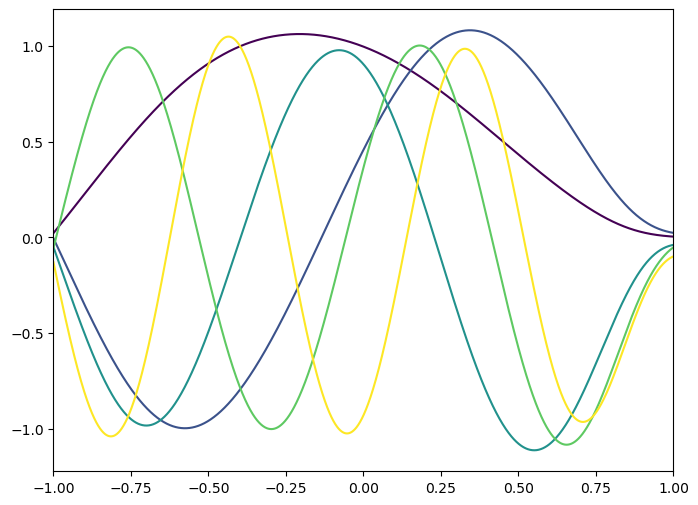

In [7]:
# i = slice(10,20)
i = slice(0,5)
# i = 16
fig = plt.figure(figsize = (8,6))
u[:,i].plot(fig = fig)
# print(np.max(u[:,i].vscale))
# plt.title(f'First {i+1} left singular functions for a Laplacian')
plt.xlim([-1,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [8]:
%%time
theta_ = 3
Ginterp = mean.generateNewModel(theta_)

CPU times: user 4.15 s, sys: 8.54 s, total: 12.7 s
Wall time: 1.32 s


In [9]:
Ginterp

chebfun2 object
     domain       rank               corner values
[-1.0,1.0] x [-1.0,1.0]     23       [0.019 0.008 -0.009 0.022]
vertical scale = 0.447013

In [10]:
%%time
u,s,v = Ginterp.svd()

CPU times: user 994 ms, sys: 1.05 s, total: 2.05 s
Wall time: 219 ms


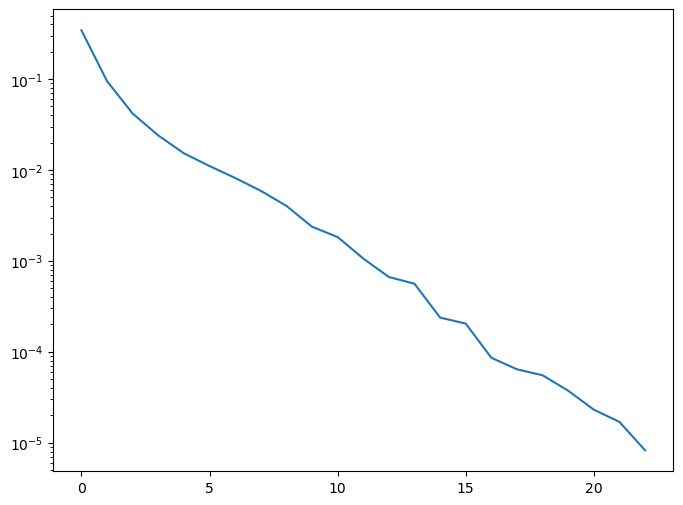

In [11]:
fig = plt.figure(figsize = (8,6))
plt.semilogy(s)

(-1.0, 1.0)

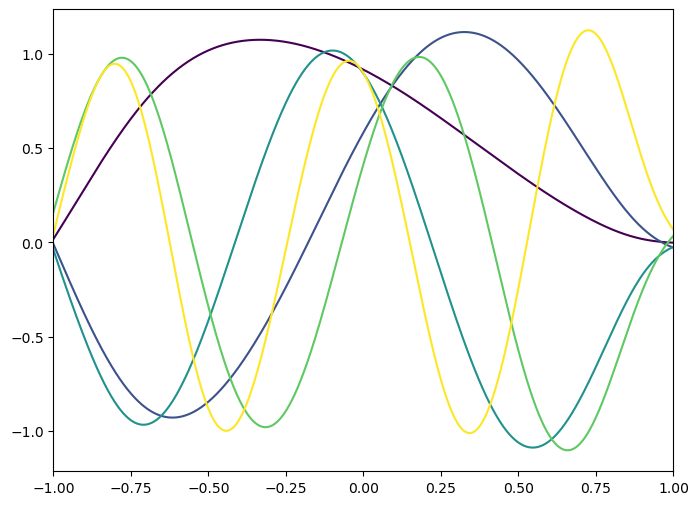

In [12]:
# i = slice(10,20)
i = slice(0,5)
# i = 16
fig = plt.figure(figsize = (8,6))
u[:,i].plot(fig = fig)
# print(np.max(u[:,i].vscale))
# plt.title(f'First {i+1} left singular functions for a Laplacian')
plt.xlim([-1,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [13]:
validation = ChebGreen([theta_], domain, generateData, script, example, homogeneousBC)

Generating dataset for example 'mean_condition'
Dataset found for Theta = 3.00. Skipping dataset generation.
-------------------------------------------------------------------------------

Generating chebfun2 models:
Found saved model, Loading model for example 'mean_condition' at Theta = 3.00
Learning a chebfun2 model for example 'mean_condition' at Theta = 3.00
Chebfun2 model added for example 'mean_condition' at Theta = 3.00



In [14]:
validation.G

{3.0: chebfun2 object
      domain       rank               corner values
 [-1,1] x [-1,1]     36       [0.015 0.004 0.006 0.030]
 vertical scale = 0.438348}

In [15]:
def compareGreen1D(interpModel, exactModel, vmin = None, vmax = None):
    domain = interpModel.domain
    xx = np.linspace(domain[2],domain[3],2000)
    yy = np.linspace(domain[0],domain[1],2000)
    x, s = np.meshgrid(xx,yy)
    
    if vmin is None:
        vmin = min(interpModel.min,exactModel.min)
    if vmax is None:
        vmax = max(interpModel.max,exactModel.max)
        
    plt.figure(figsize = (16,6))
    plt.subplot(121)
    
    GInterp = interpModel[x,s]
    
    levels = np.linspace(vmin, vmax, 50, endpoint = True)
    ticks = np.linspace(vmin, vmax, 10, endpoint=True)
    
    surf = plt.contourf(x, s, GInterp, levels = levels, cmap = 'turbo', vmin = vmin, vmax = vmax)
    plt.gca().set_aspect('equal', adjustable='box')
    cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)
    cbar.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
    plt.xlabel('$x$', fontsize = 11)
    plt.ylabel('$s$', rotation='horizontal', labelpad=10, fontsize = 11)
    plt.title("Interpolated", fontsize = 14)
    
    GExact = exactModel[x,s]
    
    plt.subplot(122)
    plt.gca().set_aspect('equal', adjustable='box')
    surf = plt.contourf(x, s, GExact, levels = levels, cmap = 'turbo', vmin = vmin, vmax = vmax)
    cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)
    cbar.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
    plt.xlabel('x', fontsize = 11)
    plt.ylabel('s', rotation='horizontal', labelpad=10, fontsize = 11)
    plt.title("Data", fontsize = 14)

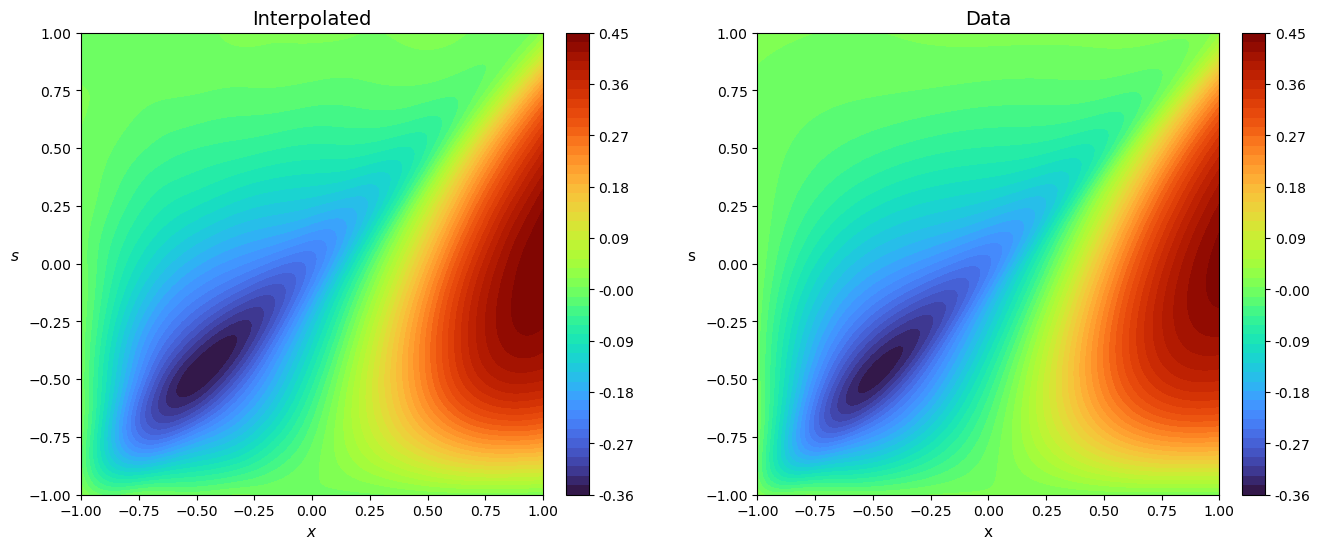

In [16]:
compareGreen1D(Ginterp,validation.G[theta_])

In [17]:
mean.computeEmpiricalError(theta_)

1.0271643412756686

In [18]:
validation.computeEmpiricalError(theta_)

1.0264054493553334

In [21]:
e = Ginterp-validation.G[theta_]

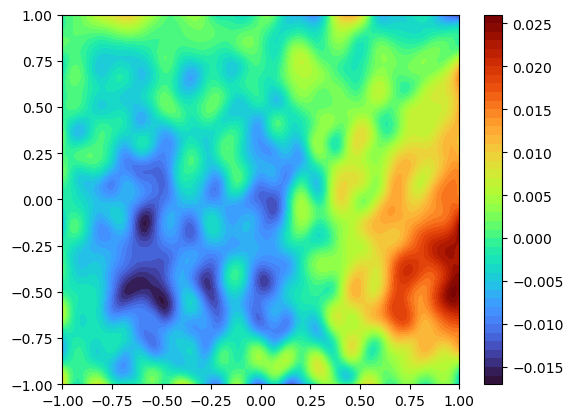

In [22]:
e.plot()

In [23]:
e.norm()/validation.G[theta_].norm()

0.2338532714471614